In [881]:
#goto command and goto directory with many csv files and run this script the combined csv file will be outpted as result.csv in the current directory 
import pandas as pd
import csv
import glob
import os
from itertools import ifilter
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as dates
import plotly
print plotly.__version__            # version 1.9.4 required
plotly.offline.init_notebook_mode() # run at the start of every notebook

#datapath and result path in the current directory in command
datapath = '/Users/Rishab/Documents/Oorja/csv/meter data/'

# Initialize the empty rows. It does not check how many rows are
# in the file.
rows = []
n_row = 0 # assign row number counter

for fname in glob.glob(os.path.join(datapath, '*.csv')):
    with open(fname, 'rUb') as f:
        reader = csv.reader(f)
        for n, row in enumerate(reader):
            rows.append([]) 
            rows[n_row].extend(row)  
            n_row = n_row+1
            
df = pd.DataFrame(rows) 
df.columns = [i for i in df[:1].values]
df = df.ix[1:]
df = df.convert_objects(convert_numeric=True)
df.Datetime = map(lambda x: datetime.strptime(x, '%d-%b-%Y %H:%M'),df.Datetime)
df.index = df.Datetime

# calibration
df['Phase 1 current'] = df['Phase 1 current']*1.517701101853632
df['Consumption'] = df['Consumption']*1.517701101853632

class calculation:
    def daily_kwh_consumption(self,df):
        start =  df.Consumption.resample('D',how='first')
        end =  df.Consumption.resample('D',how='last')
        return end-start
    
    def daily_peak_consumption(self,df):
        peak =  (df['Phase 1 current']*1.517701101853632*df['Phase 1 voltage']*1.517701101853632).resample('D',how='max')
        return peak
    
class plot_demand():
    def daily_kwh_consumption(self,df):
        plt.xticks(rotation = 70)
        plt.plot(df,marker = '+')
        plt.title('Meter')
        plt.ylabel('Wh')
        plt.axhline(y=df.mean(),color = 'r',label = 'Average consumption')
        plt.legend()
        plt.show
        


1.9.3


/Users/Rishab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [882]:
df209 = df[df['Meter description']==20908001]
df209 = df209.convert_objects(convert_numeric=True)

df215 = df[df['Meter description']==21508001]
df215 = df215.convert_objects(convert_numeric=True)

df174 = df[df['Meter description']==17408001]
df174 = df174.convert_objects(convert_numeric=True)

df179 = df[df['Meter description']==17908001]
df179 = df179.convert_objects(convert_numeric=True)
    

/Users/Rishab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

/Users/Rishab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

/Users/Rishab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

/Users/Rishab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



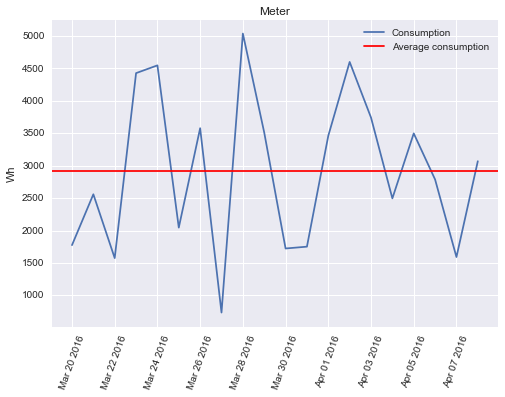

In [883]:
plot_demand().daily_kwh_consumption((calculation().daily_kwh_consumption(df179)))
a = calculation().daily_kwh_consumption(df179)

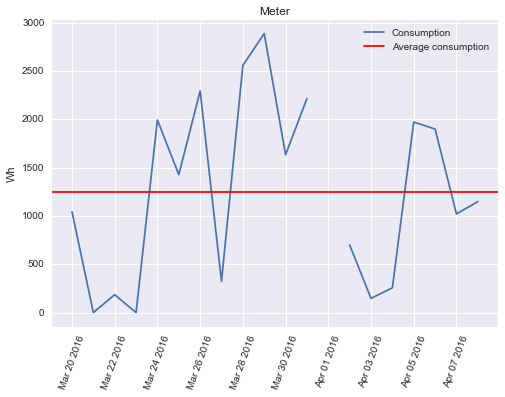

In [884]:
plot_demand().daily_kwh_consumption((calculation().daily_kwh_consumption(df174)))
b = calculation().daily_kwh_consumption(df174)

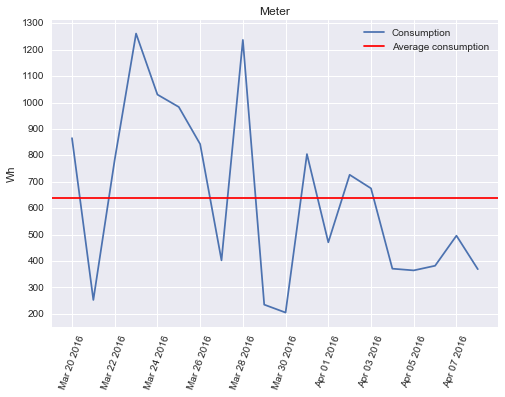

In [885]:
plot_demand().daily_kwh_consumption((calculation().daily_kwh_consumption(df209)))
c = calculation().daily_kwh_consumption(df209)

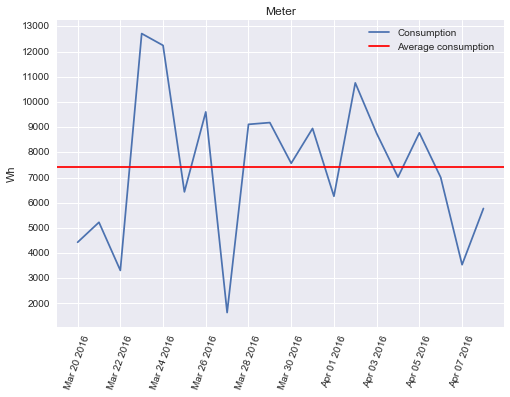

In [886]:
plot_demand().daily_kwh_consumption((calculation().daily_kwh_consumption(df215)))
d=calculation().daily_kwh_consumption(df215)

Bank 2.92581659565
Clinic 7.41399575936
Photocopy 0.637990624347
Tailor 1.24745385182


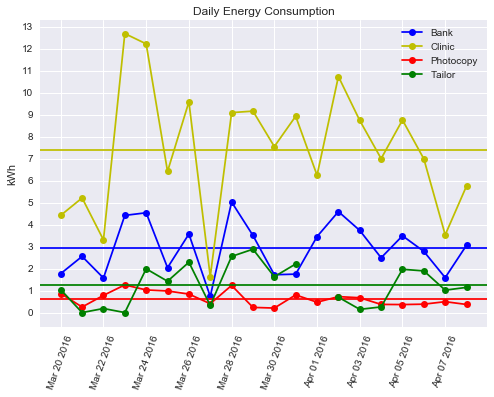

In [887]:
plt.figure(1)

plt.plot(a/1000,marker = 'o',label = 'Bank',color='b')
plt.axhline((a/1000).mean(),color='b')
print 'Bank', (a/1000).mean()
plt.plot(d/1000,marker = 'o',label = 'Clinic',color='y')
plt.axhline((d/1000).mean(),color='y')
print 'Clinic', (d/1000).mean()
plt.plot(c/1000,marker = 'o',label = 'Photocopy',color='r')
plt.axhline((c/1000).mean(),color='r')
print 'Photocopy', (c/1000).mean()
plt.plot(b/1000,marker = 'o',label = 'Tailor',color='g')
plt.axhline((b/1000).mean(),color='g')
print 'Tailor', (b/1000).mean()

plt.legend()
plt.xticks(rotation=70)
plt.ylabel('kWh')
plt.title('Daily Energy Consumption')


(array([ 736043.,  736045.,  736047.,  736049.,  736051.,  736053.,
         736055.,  736057.,  736059.,  736061.]),
 <a list of 10 Text xticklabel objects>)

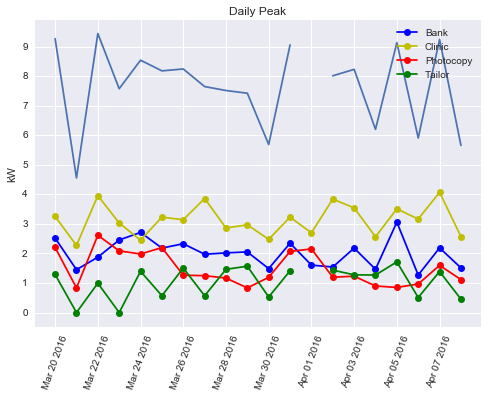

In [888]:
plt.plot(calculation().daily_peak_consumption(df179)/1000,marker = 'o',label = 'Bank',color='b')
plt.plot(calculation().daily_peak_consumption(df215)/1000,marker = 'o',label = 'Clinic',color='y')
plt.plot(calculation().daily_peak_consumption(df209)/1000,marker = 'o',label = 'Photocopy',color='r')
plt.plot(calculation().daily_peak_consumption(df174)/1000,marker = 'o',label = 'Tailor',color='g')
plt.plot(calculation().daily_peak_consumption(df174)/1000+calculation().daily_peak_consumption(df209)/1000+calculation().daily_peak_consumption(df215)/1000+calculation().daily_peak_consumption(df179)/1000)
plt.ylabel('kW')
plt.title('Daily Peak')
plt.legend()
plt.xticks(rotation = 70)

In [893]:
import datetime
lastindex = df174.index[0]
grid = []
status = []
for time in df174.index:
    if (time - lastindex) > datetime.timedelta(seconds=900):
        grid.append(lastindex)
        grid.append(time)
        status.append(0)
        status.append(1)
    lastindex = time
grid_status = pd.DataFrame(status,columns = ['Grid_status'],index=grid)

lastindex = grid_status.index[0]
deltatime = []
for index in grid_status.index:
    time_of_failure = index - lastindex
    deltatime.append(time_of_failure.total_seconds())
    lastindex = index
grid_status['Interval_hrs'] =  map(lambda x: x/(60*60),deltatime)

    
    

3.52631578947


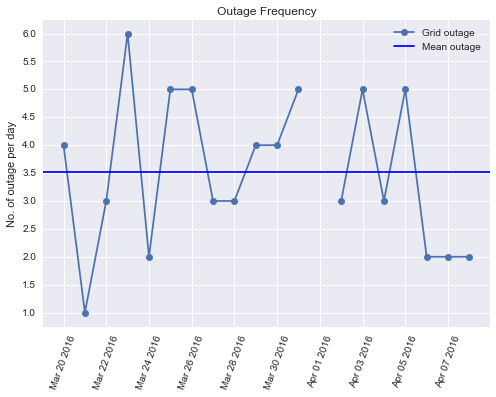

In [922]:
import seaborn
plt.title('Outage Frequency')
dfg = grid_status.resample('D',how=sum)
plt.plot(grid_status.Grid_status.resample('D',how=sum),marker='o',label = 'Grid outage')
plt.xticks(rotation=70)
plt.ylabel('No. of outage per day')
plt.axhline(grid_status.Grid_status.resample('D',how=sum).mean(),label='Mean outage')
print grid_status.Grid_status.resample('D',how=sum).mean()
plt.legend()

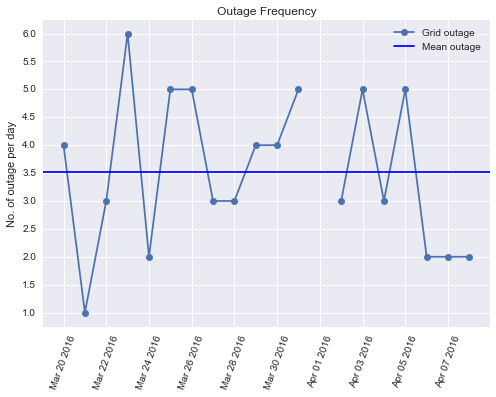

In [895]:
import seaborn
plt.title('Outage Frequency')
dfg = grid_status.resample('D',how=sum)
plt.plot(grid_status.Grid_status.resample('D',how=sum),marker='o',label = 'Grid outage')
plt.xticks(rotation=70)
plt.ylabel('No. of outage per day')
plt.axhline(grid_status.Grid_status.resample('D',how=sum).mean(),label='Mean outage')
plt.legend()

4.09713383838


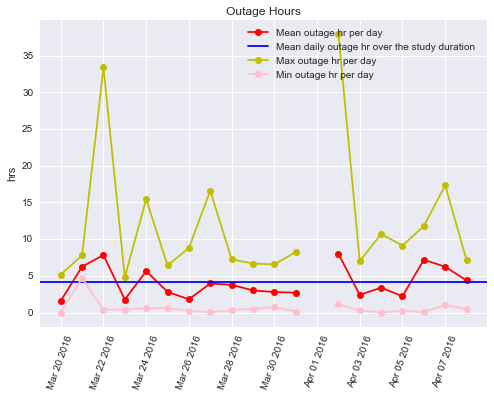

In [921]:
plt.title('Outage Hours')
hrs = grid_status.Interval_hrs.resample('D')
plt.plot(hrs.index,hrs,marker='o',label = 'Mean outage hr per day',color = 'r')
print hrs.mean()
plt.axhline(hrs.mean(),label = 'Mean daily outage hr over the study duration ')
hrs = grid_status.Interval_hrs.resample('D',how=max)
plt.plot(hrs.index,hrs,marker='o',label = 'Max outage hr per day',color = 'y')
hrs = grid_status.Interval_hrs.resample('D',how=min)
plt.plot(hrs.index,hrs,marker='o',label = 'Min outage hr per day',color = 'pink')
plt.ylabel('hrs')

plt.xticks(rotation=70)
plt.legend()

In [799]:
test = dddf[dddf.index < datetime.datetime(2016,3,21)]
test = test[test.index > datetime.datetime(2016,3,16,0)]
# ((test['Phase 1 current']*test['Phase 1 voltage'])/1000).plot()
test

0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  \
2016-03-17   1   1   1   1   1   1   1   1   1   1 ...   1   1   0   0   0   
2016-03-18   1   1   1   1   1   0   0   0   0   0 ...   1   1   0   0   0   
2016-03-19   1   1   1   1   1   0   0   0   0   0 ...   1   1   0   0   0   
2016-03-20   1   1   1   1   1   0   0   0   0   0 ...   1   1   1   1   1   

            19  20  21  22  23  
2016-03-17   1   1   1   1   1  
2016-03-18   1   1   1   1   1  
2016-03-19   1   1   1   1   1  
2016-03-20   0   0   0   0   0  

[4 rows x 24 columns]

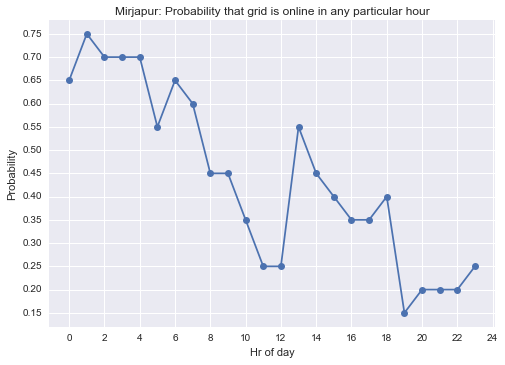

In [918]:
plt.plot(dddf.mean(),marker='o')
plt.title('Mirjapur: Probability that grid is online in any particular hour')
plt.ylabel('Probability')
plt.xlabel('Hr of day')

In [915]:
for i in range(10,14):
    dddf[i][0]=0
test
grid_status

Grid_status  Interval_hrs
2016-03-20 05:02:00            0      0.000000
2016-03-20 10:11:00            1      5.150000
2016-03-20 10:48:00            0      0.616667
2016-03-20 12:17:00            1      1.483333
2016-03-20 12:26:00            0      0.150000
2016-03-20 14:40:00            1      2.233333
2016-03-20 14:48:00            0      0.133333
2016-03-20 15:15:00            1      0.450000
2016-03-20 19:20:00            0      4.083333
2016-03-21 00:03:00            1      4.716667
2016-03-21 07:52:00            0      7.816667
2016-03-22 17:16:00            1     33.400000
2016-03-22 18:37:00            0      1.350000
2016-03-22 19:00:00            1      0.383333
2016-03-22 19:56:00            0      0.933333
2016-03-22 23:00:00            1      3.066667
2016-03-23 00:43:00            0      1.716667
2016-03-23 01:31:00            1      0.800000
2016-03-23 05:32:00            0      4.016667
2016-03-23 06:58:00            1      1.433333
2016-03-23 11:48:00            0      4.833333
2016-03-23 13:41:00            1      1.883333
2016-03-23 14:06:00            0      0.416667
2016-03-23 14:46:00            1      0.666667
2016-03-23 16:43:00            0      1.950000
2016-03-23 17:32:00            1      0.816667
2016-03-23 19:13:00            0      1.683333
2016-03-23 20:19:00            1      1.100000
2016-03-24 11:45:00            0     15.433333
2016-03-24 12:20:00            1      0.583333
...                          ...           ...
2016-04-03 16:52:00            0      0.283333
2016-04-03 17:51:00            1      0.983333
2016-04-03 19:10:00            0      1.316667
2016-04-04 00:37:00            1      5.450000
2016-04-04 11:19:00            0     10.700000
2016-04-04 13:55:00            1      2.600000
2016-04-04 13:55:00            0      0.000000
2016-04-04 14:56:00            1      1.016667
2016-04-04 15:30:00            0      0.566667
2016-04-05 00:38:00            1      9.133333
2016-04-05 09:00:00            0      8.366667
2016-04-05 09:26:00            1      0.433333
2016-04-05 09:42:00            0      0.266667
2016-04-05 10:04:00            1      0.366667
2016-04-05 10:35:00            0      0.516667
2016-04-05 11:11:00            1      0.600000
2016-04-05 11:26:00            0      0.250000
2016-04-05 11:58:00            1      0.533333
2016-04-05 13:44:00            0      1.766667
2016-04-06 00:38:00            1     10.900000
2016-04-06 12:25:00            0     11.783333
2016-04-06 18:27:00            1      6.033333
2016-04-06 18:31:00            0      0.066667
2016-04-07 11:51:00            1     17.333333
2016-04-07 14:00:00            0      2.150000
2016-04-07 18:29:00            1      4.483333
2016-04-07 19:30:00            0      1.016667
2016-04-08 01:00:00            1      5.500000
2016-04-08 08:08:00            0      7.133333
2016-04-08 08:38:00            1      0.500000

[134 rows x 2 columns]

[datetime.date(2016, 3, 20), datetime.date(2016, 3, 21), datetime.date(2016, 3, 22), datetime.date(2016, 3, 23), datetime.date(2016, 3, 24), datetime.date(2016, 3, 25), datetime.date(2016, 3, 26), datetime.date(2016, 3, 27), datetime.date(2016, 3, 28), datetime.date(2016, 3, 29), datetime.date(2016, 3, 30), datetime.date(2016, 3, 31), datetime.date(2016, 4, 1), datetime.date(2016, 4, 2), datetime.date(2016, 4, 3), datetime.date(2016, 4, 4), datetime.date(2016, 4, 5), datetime.date(2016, 4, 6), datetime.date(2016, 4, 7), datetime.date(2016, 4, 8)]


([<matplotlib.axis.YTick at 0x14dfc5790>,
 <a list of 20 Text yticklabel objects>)

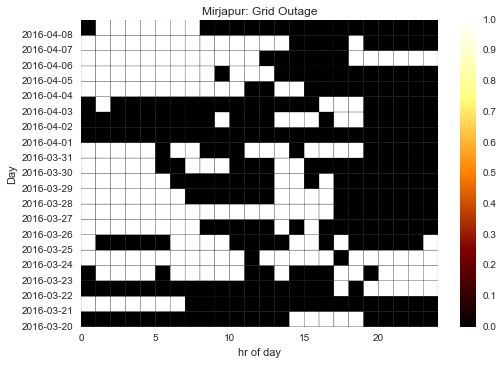

In [916]:
plt.pcolor(dddf,cmap = 'afmhot',edgecolor='k',label = 'Grid status')
plt.colorbar()
plt.title('Mirjapur: Grid Outage')
plt.ylabel('Day')
plt.xlabel('hr of day')



a = map(lambda x: x.date(),dddf.index)
print a

plt.yticks(range(len(a)),a, rotation=0)
# plt.show()

In [898]:
gsdf = grid_status.resample('H',how='first').ffill()
dddf = pd.DataFrame(np.zeros((20,24)),index = grid_status.resample('D').index)

gsdf

Grid_status  Interval_hrs
2016-03-20 05:00:00            0      0.000000
2016-03-20 06:00:00            0      0.000000
2016-03-20 07:00:00            0      0.000000
2016-03-20 08:00:00            0      0.000000
2016-03-20 09:00:00            0      0.000000
2016-03-20 10:00:00            1      5.150000
2016-03-20 11:00:00            1      5.150000
2016-03-20 12:00:00            1      1.483333
2016-03-20 13:00:00            1      1.483333
2016-03-20 14:00:00            1      2.233333
2016-03-20 15:00:00            1      0.450000
2016-03-20 16:00:00            1      0.450000
2016-03-20 17:00:00            1      0.450000
2016-03-20 18:00:00            1      0.450000
2016-03-20 19:00:00            0      4.083333
2016-03-20 20:00:00            0      4.083333
2016-03-20 21:00:00            0      4.083333
2016-03-20 22:00:00            0      4.083333
2016-03-20 23:00:00            0      4.083333
2016-03-21 00:00:00            1      4.716667
2016-03-21 01:00:00            1      4.716667
2016-03-21 02:00:00            1      4.716667
2016-03-21 03:00:00            1      4.716667
2016-03-21 04:00:00            1      4.716667
2016-03-21 05:00:00            1      4.716667
2016-03-21 06:00:00            1      4.716667
2016-03-21 07:00:00            0      7.816667
2016-03-21 08:00:00            0      7.816667
2016-03-21 09:00:00            0      7.816667
2016-03-21 10:00:00            0      7.816667
...                          ...           ...
2016-04-07 03:00:00            1      6.033333
2016-04-07 04:00:00            1      6.033333
2016-04-07 05:00:00            1      6.033333
2016-04-07 06:00:00            1      6.033333
2016-04-07 07:00:00            1      6.033333
2016-04-07 08:00:00            1      6.033333
2016-04-07 09:00:00            1      6.033333
2016-04-07 10:00:00            1      6.033333
2016-04-07 11:00:00            1     17.333333
2016-04-07 12:00:00            1     17.333333
2016-04-07 13:00:00            1     17.333333
2016-04-07 14:00:00            0      2.150000
2016-04-07 15:00:00            0      2.150000
2016-04-07 16:00:00            0      2.150000
2016-04-07 17:00:00            0      2.150000
2016-04-07 18:00:00            1      4.483333
2016-04-07 19:00:00            0      1.016667
2016-04-07 20:00:00            0      1.016667
2016-04-07 21:00:00            0      1.016667
2016-04-07 22:00:00            0      1.016667
2016-04-07 23:00:00            0      1.016667
2016-04-08 00:00:00            0      1.016667
2016-04-08 01:00:00            1      5.500000
2016-04-08 02:00:00            1      5.500000
2016-04-08 03:00:00            1      5.500000
2016-04-08 04:00:00            1      5.500000
2016-04-08 05:00:00            1      5.500000
2016-04-08 06:00:00            1      5.500000
2016-04-08 07:00:00            1      5.500000
2016-04-08 08:00:00            0      7.133333

[460 rows x 2 columns]

In [904]:
hr_col = 5
day_row = 0
for date,data in gsdf.iterrows():
    dddf[hr_col][day_row] = data['Grid_status']
    
    if hr_col == 23: 
        hr_col = 0
        day_row = day_row +1
    else: hr_col = hr_col +1

    
print dddf

            0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  \
2016-03-20   0   0   0   0   0   0   0   0   0   0 ...   1   1   1   1   1   
2016-03-21   1   1   1   1   1   1   1   0   0   0 ...   0   0   0   0   0   
2016-03-22   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   1   0   
2016-03-23   0   1   1   1   1   0   1   1   1   1 ...   0   0   0   1   1   
2016-03-24   1   1   1   1   1   1   1   1   1   1 ...   1   1   1   0   1   
2016-03-25   1   0   0   0   0   0   1   1   1   1 ...   1   1   0   1   0   
2016-03-26   1   1   1   1   1   1   1   1   0   0 ...   0   1   0   0   0   
2016-03-27   1   1   1   1   1   1   1   1   1   1 ...   1   1   1   0   0   
2016-03-28   1   1   1   1   1   1   1   0   0   0 ...   1   1   1   0   0   
2016-03-29   1   1   1   1   1   1   0   0   0   0 ...   1   0   1   0   0   
2016-03-30   1   1   1   1   1   0   0   1   1   1 ...   1   0   0   0   0   
2016-03-31   1   1   1   1   1   0   1   1   0   0 ...   0   1  

AttributeError: 'Timestamp' object has no attribute 'read'

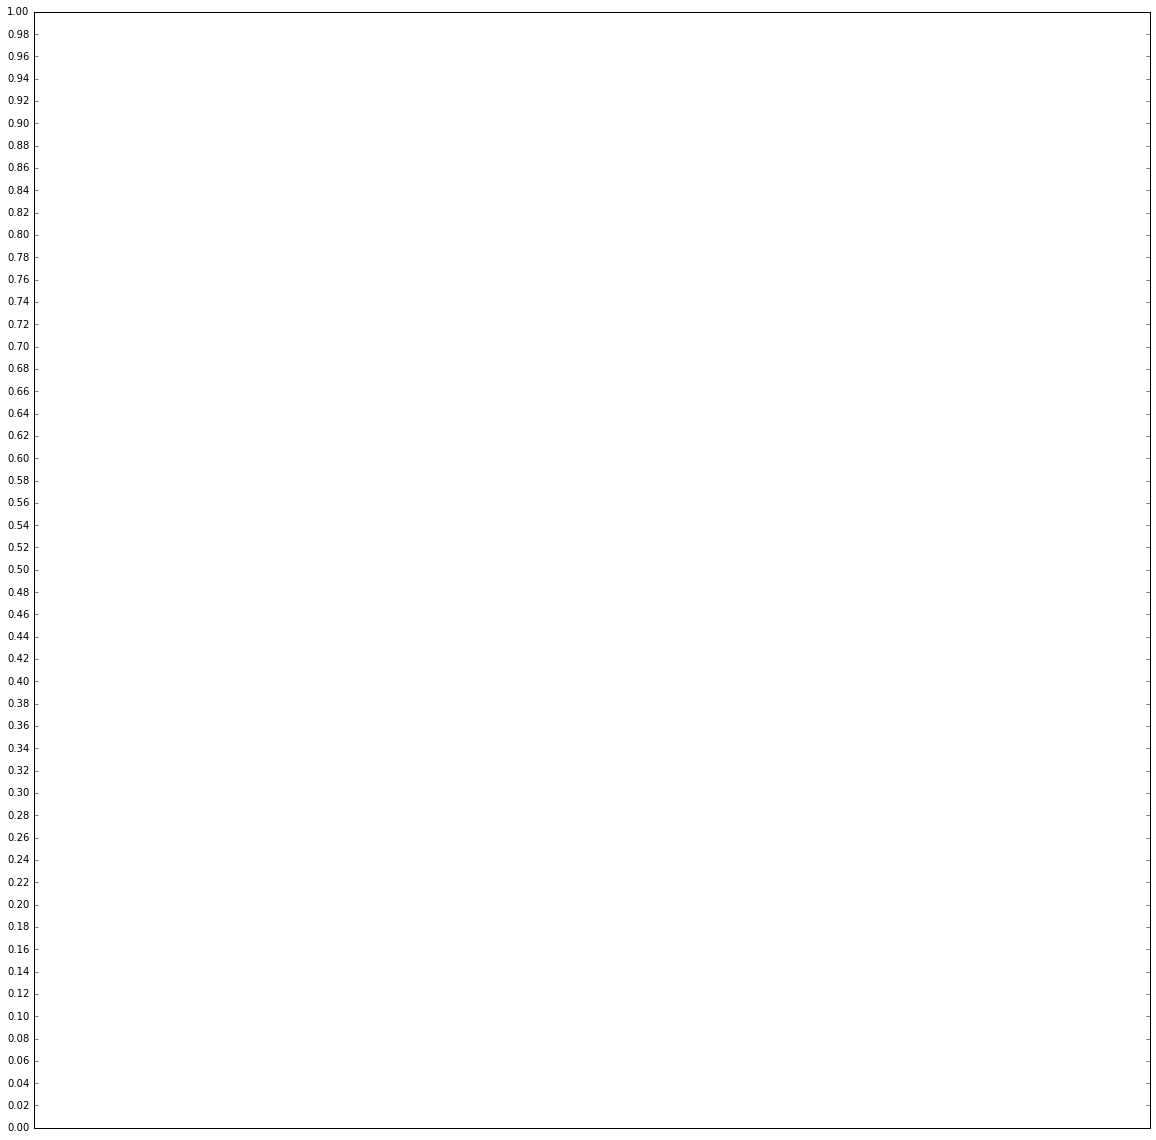

In [365]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
hfmt = dates.DateFormatter('%m/%d %H:%M')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=60))
ax.xaxis.set_major_formatter(hfmt)
ax.plot(map(lambda x:dates.datestr2num(x),df174.Datetime),df174['Phase 1 current']/0.66*df174['Phase 1 voltage']*abs(df174['Power factor 1']))
#ax2 = ax.twinx()
#ax2.plot(map(lambda x:dates.datestr2num(x),df174.Datetime),df174['Phase 1 voltage'],color='r')
plt.xticks(rotation='vertical')
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
datemin = dates.datestr2num('20-Mar-2016 13:00')
datemax = dates.datestr2num('20-Mar-2016 19:00')
ax.set_xlim(datemin,datemax)
loc = ticker.MultipleLocator(base=.01) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.gcf().autofmt_xdate()

AttributeError: 'Timestamp' object has no attribute 'read'

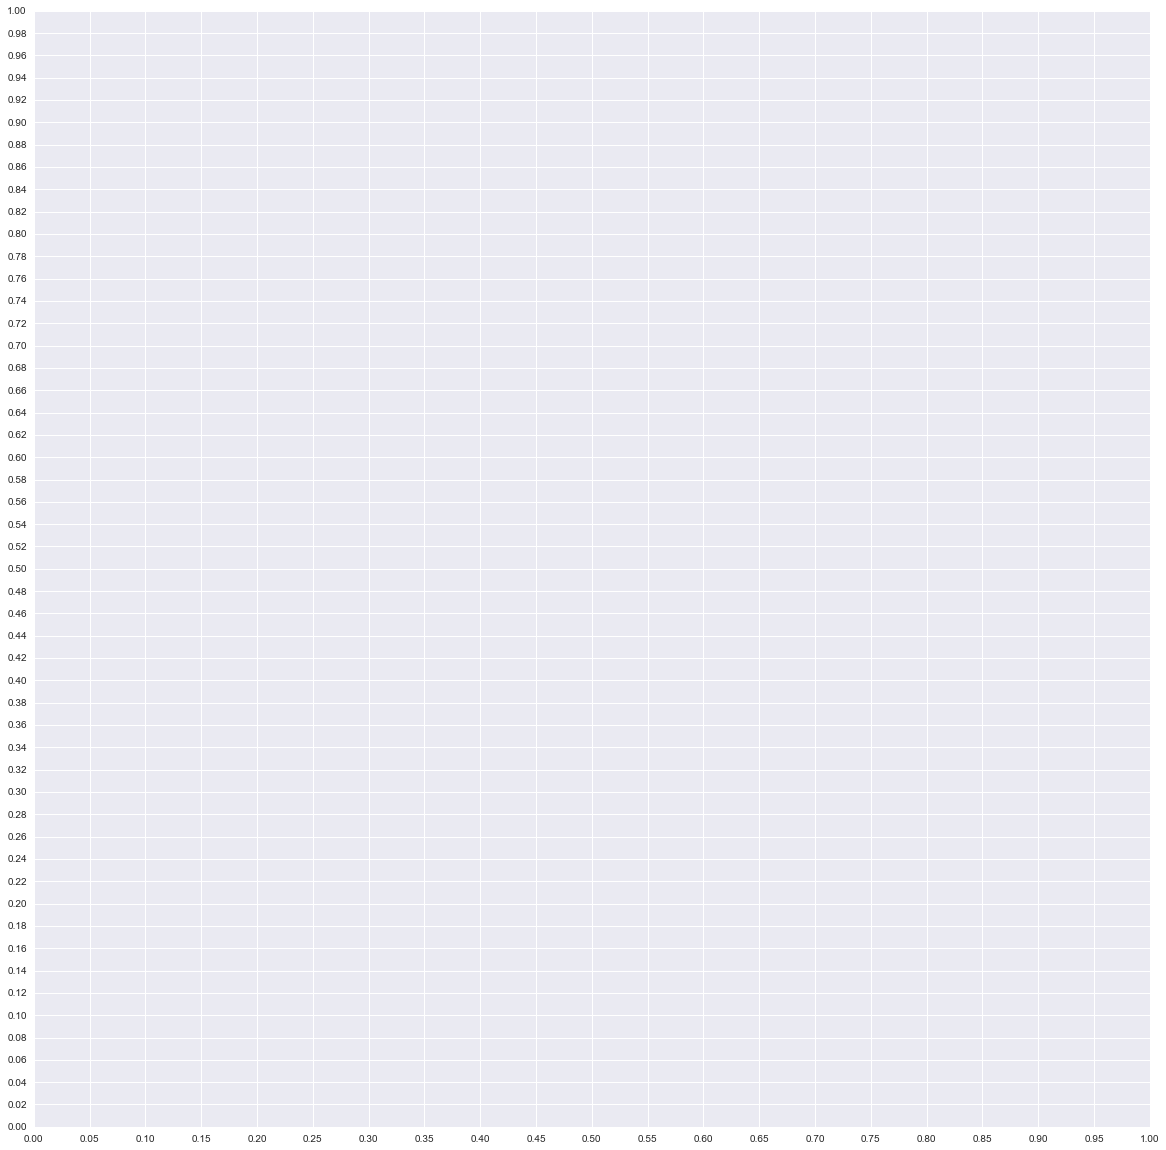

In [718]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
hfmt = dates.DateFormatter('%m/%d %H:%M')

ax.plot(map(lambda x:dates.datestr2num(x),df215.Datetime),df215['Phase 1 current']*df215['Phase 1 voltage'])
#ax2 = ax.twinx()
#ax2.plot(map(lambda x:dates.datestr2num(x),df215.Datetime),df215['Phase 1 voltage'],color='r')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(hfmt)
plt.xticks(rotation='vertical')
datemin = dates.datestr2num('20-Mar-2016 13:00')
datemax = dates.datestr2num('20-Mar-2016 19:00')
ax.set_xlim(datemin,datemax)
#plt.gcf().autofmt_xdate()

(array([ 736043.54166667,  736043.58333333,  736043.625     ,
         736043.66666667,  736043.70833333,  736043.75      ,
         736043.79166667]), <a list of 7 Text xticklabel objects>)

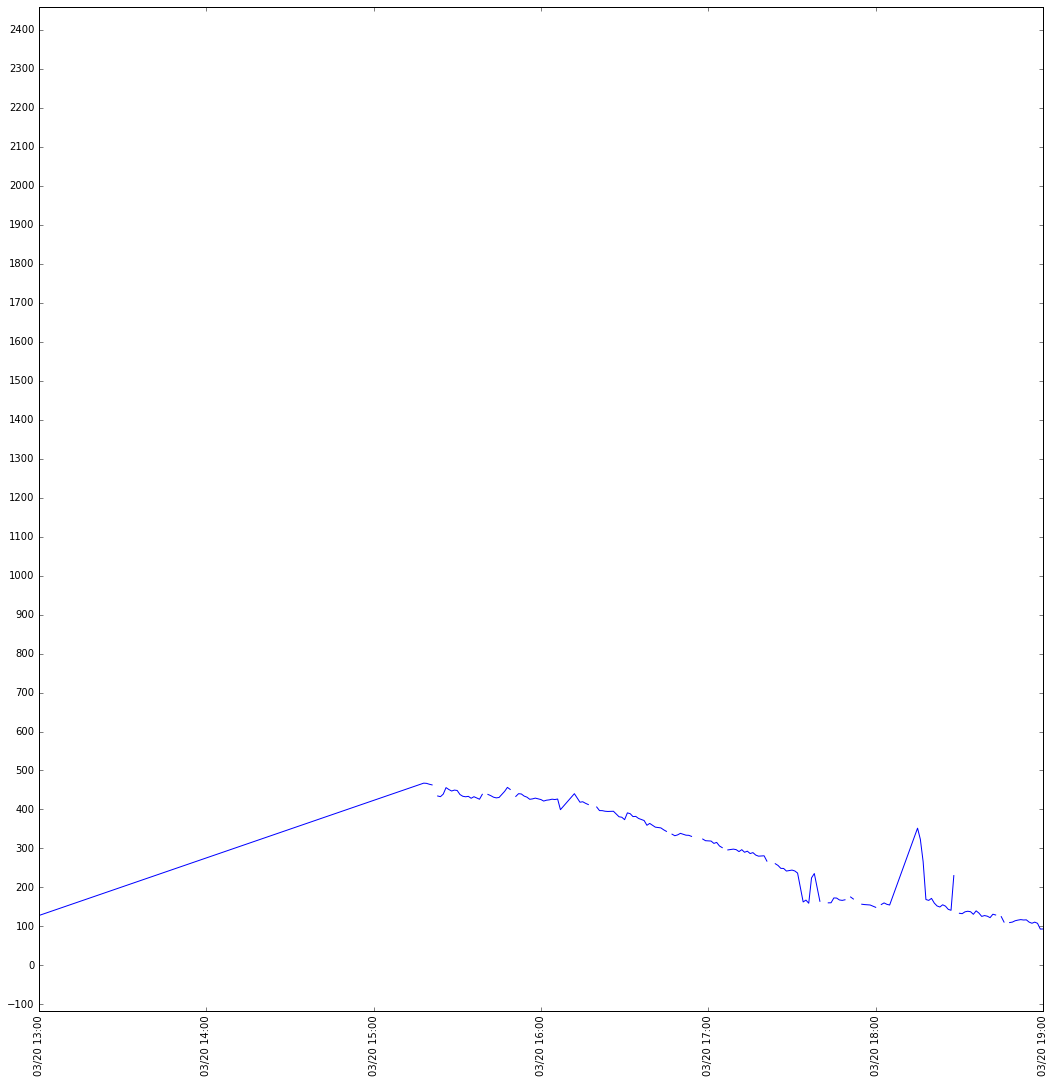

In [106]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
hfmt = dates.DateFormatter('%m/%d %H:%M')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=60))
ax.xaxis.set_major_formatter(hfmt)
ax.plot(map(lambda x:dates.datestr2num(x),df209.Datetime),df209['Phase 1 current']/.66*df209['Phase 1 voltage'])
datemin = dates.datestr2num('20-Mar-2016 13:00')
datemax = dates.datestr2num('20-Mar-2016 19:00')
ax.set_xlim(datemin,datemax)
plt.xticks(rotation='vertical')
# plt.gcf().autofmt_xdate()



(array([ 736043.54652778,  736043.58819444,  736043.62986111,
         736043.67152778,  736043.71319444,  736043.75486111,
         736043.79652778,  736043.83819444,  736043.87986111,
         736043.92152778,  736043.96319444,  736044.00486111,
         736044.04652778,  736044.08819444,  736044.12986111,
         736044.17152778,  736044.21319444,  736044.25486111,
         736044.29652778,  736044.33819444,  736044.37986111,
         736044.42152778]), <a list of 22 Text xticklabel objects>)

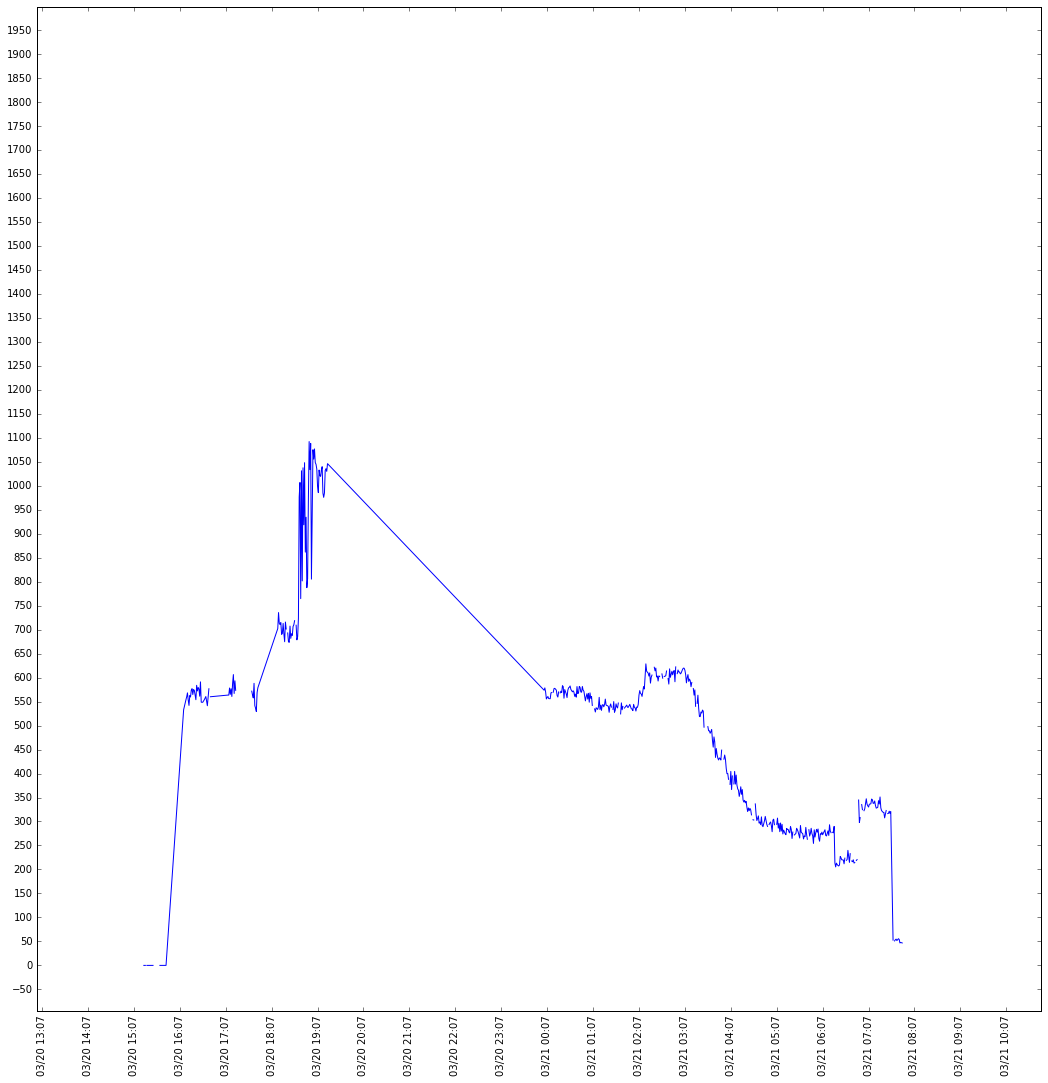

In [109]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
hfmt = dates.DateFormatter('%m/%d %H:%M')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=60))
ax.xaxis.set_major_formatter(hfmt)
ax.plot(map(lambda x:dates.datestr2num(x),df179.Datetime),df179['Phase 1 current']/.66*df179['Phase 1 voltage'])
datemin = dates.datestr2num('20-Mar-2016 13:00')
ax.set_xlim(datemin)
plt.xticks(rotation='vertical')
# plt.gcf().autofmt_xdate()


In [64]:
df179test = df179[['Datetime','Phase 1 current', 'Phase 1 voltage','Frequency','Power factor 1']]
df209test= df209[['Datetime','Phase 1 current', 'Phase 1 voltage','Frequency','Power factor 1']]

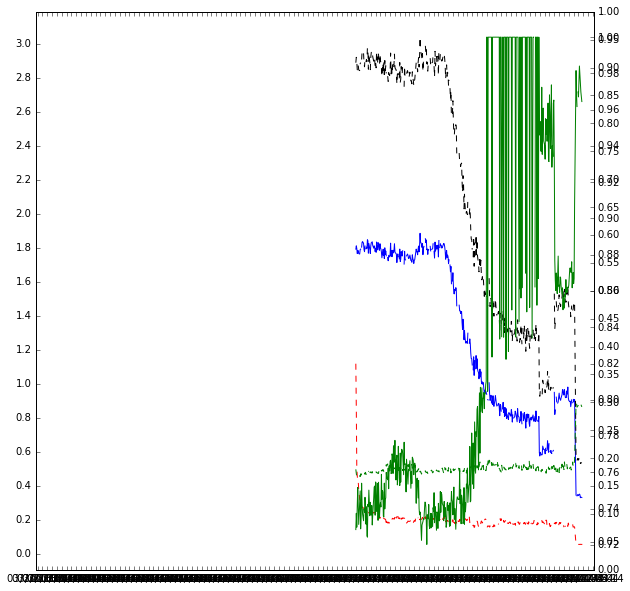

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
hfmt = dates.DateFormatter('%m/%d %H:%M')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=10))
ax.xaxis.set_major_formatter(hfmt)
ax.plot(map(lambda x:dates.datestr2num(x),df179test.Datetime),df179['Phase 1 current'])#df209['Phase 1 voltage']*abs(df209['Power factor 1']))
ax1= ax.twinx()
ax1.plot(map(lambda x:dates.datestr2num(x),df179test.Datetime),abs(df179['Power factor 1']),color = 'g')

ax.plot(map(lambda x:dates.datestr2num(x),df209test.Datetime),df209['Phase 1 current'],color = 'r',ls ='--')#df209['Phase 1 voltage']*abs(df209['Power factor 1']))
ax.plot(map(lambda x:dates.datestr2num(x),df179test.Datetime),df179['Phase 1 current']/0.6202,color = 'black',ls ='--')#df209['Phase 1 voltage']*abs(df209['Power factor 1']))

ax.plot(map(lambda x:dates.datestr2num(x),df209test.Datetime),abs(df209['Power factor 1']),color = 'g',ls ='--')
datemin = dates.datestr2num('20-Mar-2016 13:00')
ax.set_xlim(datemin)
plt.xticks(rotation='vertical')
ax2= ax.twinx()



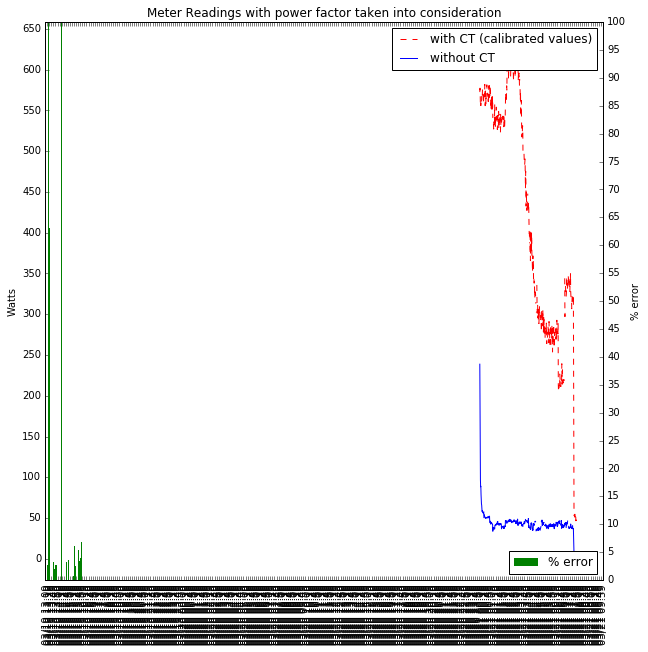

In [61]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
hfmt = dates.DateFormatter('%m/%d %H:%M')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=10))
ax.xaxis.set_major_formatter(hfmt)
#.6614447365602958
calib_constant = .6614447365602958
ax.plot(map(lambda x:dates.datestr2num(x),df179.Datetime),(df179['Phase 1 current']/calib_constant)*df179['Phase 1 voltage'],color = 'r',ls ='--',label = 'with CT (calibrated values)')
ax.plot(map(lambda x:dates.datestr2num(x),df209.Datetime),df209['Phase 1 current']*df209['Phase 1 voltage'],label = 'without CT')#
datemin = dates.datestr2num('19-Mar-2016 13:00')

plt.xticks(rotation='vertical')

w = .0004
first_legend = ax.legend()
ax1 = ax.twinx()
error = abs((df179test['Phase 1 current']/calib_constant)*df179test['Phase 1 voltage']-df209test['Phase 1 current']*df209test['Phase 1 voltage'])
error_percent = error.divide(df209test['Phase 1 current']*df209test['Phase 1 voltage'])*100

ax1.bar(map(lambda x:dates.datestr2num(x),df209test.Datetime),error_percent,width=w,color = 'green',label = '% error')
ax1.set_ylim(0,1700)
ax1.set_ylim(0,100)
ax.set_xlim(datemin)
ax.set_ylabel("Watts")
ax1.set_ylabel("% error")
ax.legend()
ax.set_title("Meter Readings with power factor taken into consideration")
ax1.legend(loc=4)


ValueError: x and y must have same first dimension, but have shapes (177,) and (439,)

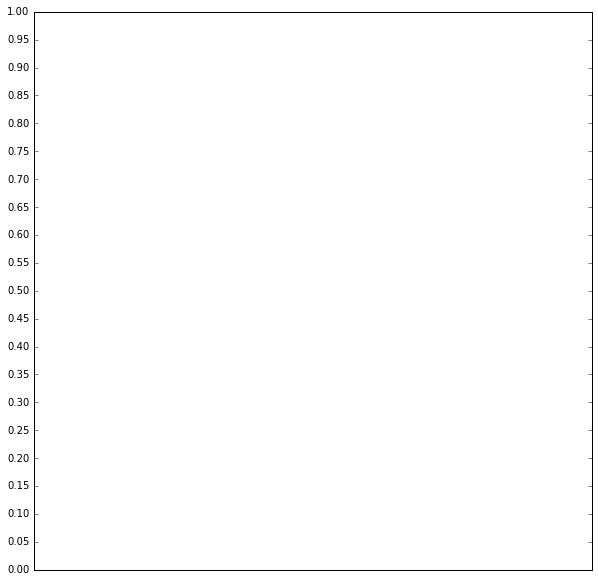

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
hfmt = dates.DateFormatter('%m/%d %H:%M')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=60))
ax.xaxis.set_major_formatter(hfmt)
ax.plot(map(lambda x:dates.datestr2num(x),df179test.Datetime),df179['Phase 1 voltage'])
ax1 = ax.twinx()
ax1.plot(map(lambda x:dates.datestr2num(x),df209test.Datetime),df209['Phase 1 voltage'],color = 'r')#*abs(df209['Power factor 1']))
datemin = dates.datestr2num('19-Mar-2016 13:00')
ax.set_xlim(datemin)
ax.set_ylim(0,250)
plt.xticks(rotation='vertical')
# plt.gcf().autofmt_xdate()

In [19]:
df209test.index = df209['Datetime']
df179test.index = df179['Datetime']
df = ((df209test['Phase 1 current'].sub(df179test['Phase 1 current'])))/df209test['Phase 1 current']
1-df[df.index > '19-Mar-2016 12:00'].mean()


0.6588912657298978

In [609]:
error_percent.mean()

7.500276481430504

In [597]:
error_percent = error.divide(df209test['Phase 1 current']*df209test['Phase 1 voltage']*)*100

In [20]:
error_percent.mean()

6.215190056220132

In [34]:
ct =pd.DataFrame((df179['Phase 1 current']/calib_constant)*df179['Phase 1 voltage'])
meter = pd.DataFrame(df209['Phase 1 current']*df209['Phase 1 voltage'])
ct.index = map(lambda x:dates.datestr2num(x),df179.Datetime)
meter.index = map(lambda x:dates.datestr2num(x),df209.Datetime)

In [50]:
len(df179)
# for 0.6588912657298978 error mean is -3.364164
# for  -4.87107

177

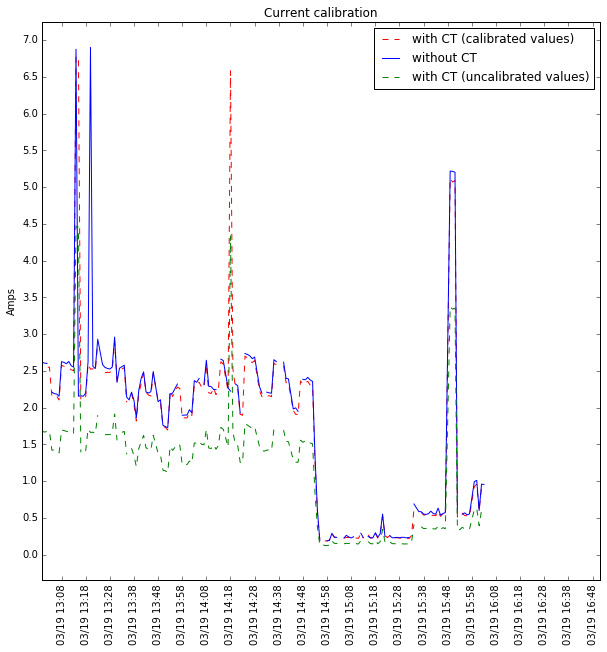

In [46]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
hfmt = dates.DateFormatter('%m/%d %H:%M')
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=10))
ax.xaxis.set_major_formatter(hfmt)
#.6614447365602958
calib_constant = 0.6588912657298978
ax.plot(map(lambda x:dates.datestr2num(x),df179.Datetime),(df179['Phase 1 current']/calib_constant),color = 'r',ls ='--',label = 'with CT (calibrated values)')
ax.plot(map(lambda x:dates.datestr2num(x),df209.Datetime),df209['Phase 1 current'],label = 'without CT')#
ax.plot(map(lambda x:dates.datestr2num(x),df179.Datetime),(df179['Phase 1 current']),color = 'green',ls ='--',label = 'with CT (uncalibrated values)')
datemin = dates.datestr2num('19-Mar-2016 13:00')
plt.xticks(rotation='vertical')
plt.title("Current calibration")
ax.set_xlim(datemin)
ax.set_ylabel("Amps")
plt.legend()

In [719]:
df179

﻿Meter id  Meter description            Datetime  \
Datetime                                                                
2016-03-20 00:00:00   17908001           17908001 2016-03-20 00:00:00   
2016-03-20 00:01:00   17908001           17908001 2016-03-20 00:01:00   
2016-03-20 00:02:00   17908001           17908001 2016-03-20 00:02:00   
2016-03-20 00:03:00   17908001           17908001 2016-03-20 00:03:00   
2016-03-20 00:05:00   17908001           17908001 2016-03-20 00:05:00   
2016-03-20 00:06:00   17908001           17908001 2016-03-20 00:06:00   
2016-03-20 00:07:00   17908001           17908001 2016-03-20 00:07:00   
2016-03-20 00:08:00   17908001           17908001 2016-03-20 00:08:00   
2016-03-20 00:09:00   17908001           17908001 2016-03-20 00:09:00   
2016-03-20 00:10:00   17908001           17908001 2016-03-20 00:10:00   
2016-03-20 00:11:00   17908001           17908001 2016-03-20 00:11:00   
2016-03-20 00:12:00   17908001           17908001 2016-03-20 00:12:00   
2016-03-20 00:13:00   17908001           17908001 2016-03-20 00:13:00   
2016-03-20 00:14:00   17908001           17908001 2016-03-20 00:14:00   
2016-03-20 00:15:00   17908001           17908001 2016-03-20 00:15:00   
2016-03-20 00:16:00   17908001           17908001 2016-03-20 00:16:00   
2016-03-20 00:17:00   17908001           17908001 2016-03-20 00:17:00   
2016-03-20 00:18:00   17908001           17908001 2016-03-20 00:18:00   
2016-03-20 00:19:00   17908001           17908001 2016-03-20 00:19:00   
2016-03-20 00:21:00   17908001           17908001 2016-03-20 00:21:00   
2016-03-20 00:22:00   17908001           17908001 2016-03-20 00:22:00   
2016-03-20 00:23:00   17908001           17908001 2016-03-20 00:23:00   
2016-03-20 00:24:00   17908001           17908001 2016-03-20 00:24:00   
2016-03-20 00:25:00   17908001           17908001 2016-03-20 00:25:00   
2016-03-20 00:26:00   17908001           17908001 2016-03-20 00:26:00   
2016-03-20 00:27:00   17908001           17908001 2016-03-20 00:27:00   
2016-03-20 00:28:00   17908001           17908001 2016-03-20 00:28:00   
2016-03-20 00:29:00   17908001           17908001 2016-03-20 00:29:00   
2016-03-20 00:30:00   17908001           17908001 2016-03-20 00:30:00   
2016-03-20 00:31:00   17908001           17908001 2016-03-20 00:31:00   
...                        ...                ...                 ...   
2016-04-08 07:48:00   17908001           17908001 2016-04-08 07:48:00   
2016-04-08 07:49:00   17908001           17908001 2016-04-08 07:49:00   
2016-04-08 07:50:00   17908001           17908001 2016-04-08 07:50:00   
2016-04-08 07:51:00   17908001           17908001 2016-04-08 07:51:00   
2016-04-08 07:52:00   17908001           17908001 2016-04-08 07:52:00   
2016-04-08 07:53:00   17908001           17908001 2016-04-08 07:53:00   
2016-04-08 07:54:00   17908001           17908001 2016-04-08 07:54:00   
2016-04-08 07:55:00   17908001           17908001 2016-04-08 07:55:00   
2016-04-08 07:56:00   17908001           17908001 2016-04-08 07:56:00   
2016-04-08 07:57:00   17908001           17908001 2016-04-08 07:57:00   
2016-04-08 07:58:00   17908001           17908001 2016-04-08 07:58:00   
2016-04-08 07:59:00   17908001           17908001 2016-04-08 07:59:00   
2016-04-08 08:01:00   17908001           17908001 2016-04-08 08:01:00   
2016-04-08 08:02:00   17908001           17908001 2016-04-08 08:02:00   
2016-04-08 08:03:00   17908001           17908001 2016-04-08 08:03:00   
2016-04-08 08:04:00   17908001           17908001 2016-04-08 08:04:00   
2016-04-08 08:05:00   17908001           17908001 2016-04-08 08:05:00   
2016-04-08 08:06:00   17908001           17908001 2016-04-08 08:06:00   
2016-04-08 08:07:00   17908001           17908001 2016-04-08 08:07:00   
2016-04-08 08:08:00   17908001           17908001 2016-04-08 08:08:00   
2016-04-08 08:38:00   17908001           17908001 2016-04-08 08:38:00   
2016-04-08 08:39:00   17908001           17908001 2016-04-08 08:39:00   
2016-0